In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('non_linear.csv')
data.head()

,param_1,param_2,validity
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


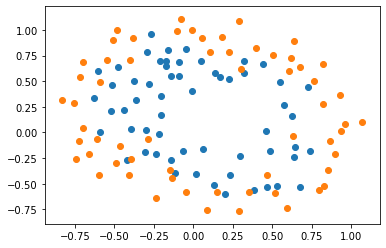

In [3]:
plt.scatter(data[data['validity'] == 1]['param_1'], data[data['validity'] == 1]['param_2'], label='valid')
plt.scatter(data[data['validity'] == 0]['param_1'], data[data['validity'] == 0]['param_2'], label='invalid')
plt.show()

In [4]:
train_data = data.sample(frac=0.8)
val_data = data.drop(train_data.index)

train_x = np.array(train_data[['param_1', 'param_2']])
train_y = np.array(train_data['validity'])

val_x = np.array(val_data[['param_1', 'param_2']])
val_y = np.array(val_data['validity'])

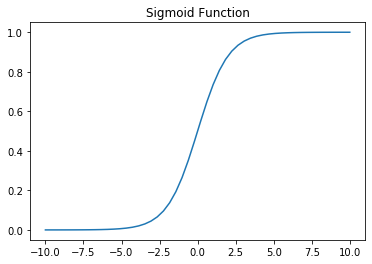

In [5]:
def generate_poly(data, degree):
    poly_data = None
    for d in range(1, 1+degree):
        poly_data = data ** d if poly_data is None else np.vstack((poly_data, data ** d))
    return poly_data.T

def sigmoid(x):
    return 1 / (1 + np.e ** -x)

x = np.linspace(-10, 10, 50)
y = sigmoid(x)
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.show()

In [26]:
m = len(train_x)
poly_degree = 4
X = np.c_[np.ones(m), train_x, generate_poly(train_x[:, 0], poly_degree), generate_poly(train_x[:, 1], poly_degree)]
Y = train_y
W = None

num_iters = 10000
lr = 0.001

for label in [0, 1]:
    w = np.random.rand(X.shape[1])
    y = np.array(Y == label).astype(float)
    for i in np.arange(num_iters):
        diff = sigmoid(X @ w) - y
        for wi in np.arange(len(w)):
            t = diff if wi == 0 else diff * X[:, wi]
            w[wi] -= lr * np.sum(t)
        
        if (i + 1) % 2000  == 0:
            t = sigmoid(X @ w)
            cost = np.sum(-y * np.log(t) - (1-y) * (np.log(1-t))) / 2 / m
            print(f'label={label} iteration={i+1} cost={cost:.5f}')
    W = w if W is None else np.vstack((W, w))

pred = np.argmax(X @ W.T, axis=1)
train_acc = np.sum(pred == Y) / len(Y)
print(f'Train Accuracy = {train_acc:.4f}')


val_X = np.c_[np.ones(len(val_x)), 
              val_x, 
              generate_poly(val_x[:, 0], poly_degree), 
              generate_poly(val_x[:, 1], poly_degree)
             ]
pred = np.argmax(val_X @ W.T, axis=1)
val_acc = np.sum(pred == val_y) / len(val_y)
print(f'Val Accuracy = {val_acc:.4f}')

label=0 iteration=2000 cost=0.20872
label=0 iteration=4000 cost=0.19784
label=0 iteration=6000 cost=0.19495
label=0 iteration=8000 cost=0.19389
label=0 iteration=10000 cost=0.19342
label=1 iteration=2000 cost=0.21026
label=1 iteration=4000 cost=0.19819
label=1 iteration=6000 cost=0.19511
label=1 iteration=8000 cost=0.19401
label=1 iteration=10000 cost=0.19353
Train Accuracy = 0.8191
Val Accuracy = 0.6250


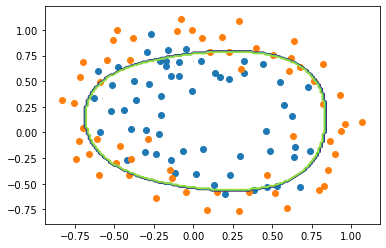

In [27]:
samples = 150

X = np.linspace(data['param_1'].min(), data['param_1'].max(), samples)
Y = np.linspace(data['param_2'].min(), data['param_2'].max(), samples)
Z = np.zeros((samples, samples))
for xi, x in enumerate(X):
    for yi, y in enumerate(Y):
        d = np.array([[x, y]])
        d = np.c_[np.ones(len(d)), 
                  d, 
                  generate_poly(d[:, 0], poly_degree), 
                  generate_poly(d[:, 1], poly_degree)
                 ]
        pred = np.argmax(d @ W.T, axis=1)
        Z[xi][yi] = pred

plt.scatter(data[data['validity'] == 1]['param_1'], data[data['validity'] == 1]['param_2'], label='valid')
plt.scatter(data[data['validity'] == 0]['param_1'], data[data['validity'] == 0]['param_2'], label='invalid')
plt.contour(X, Y, Z)
plt.show()